In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pvlib import temperature

# Faiman rad

### Importing dataframe

In [104]:
#readcsv
df = pd.read_csv("df_hourly")

if not isinstance(df["Timestamp"], pd.DatetimeIndex):
        df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace=True)

In [105]:
#readcsv
df_era5 = pd.read_csv("strd_era5_IFE.csv")  #Data from era5 for downwelling 

if not isinstance(df_era5["valid_time"], pd.DatetimeIndex):
        df_era5["valid_time"] = pd.to_datetime(df_era5["valid_time"])
df_era5.set_index("valid_time", inplace=True)

df_era5 = df_era5.tz_localize('UTC', ambiguous=False, nonexistent='NaT') #Era5 is UTC 
df_era5.index = df_era5.index - pd.Timedelta(hours=1)  #Subtracting one hour from era5 timestamps because era5 is right-bound and the dataframe we have is left-bound. 

df = df.join(df_era5, how='inner')

In [106]:
df_era5

,strd
valid_time,
2020-12-31 23:00:00+00:00,301.52335
2021-01-01 00:00:00+00:00,302.26193
2021-01-01 01:00:00+00:00,303.11722
2021-01-01 02:00:00+00:00,302.71335
2021-01-01 03:00:00+00:00,305.91138
...,...
2024-10-23 03:00:00+00:00,248.61734
2024-10-23 04:00:00+00:00,252.70175
2024-10-23 05:00:00+00:00,251.69788


In [107]:
df

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s],strd
2021-03-03 14:00:00+00:00,12.458333,13.073333,11.135000,12.458333,13.073333,11.135000,10.268333,10.630000,10.240000,10.696667,...,NaN,NaN,1003.753333,1003.253333,4.461667,82.649167,1.552500,197.610000,2.469167,247.11923
2021-03-03 15:00:00+00:00,8.590833,8.785833,6.380000,8.590833,8.785833,6.380000,7.557500,7.977500,7.859167,8.286667,...,NaN,NaN,1002.936667,1002.436667,4.480000,82.579167,1.596667,191.633333,1.775833,241.90198
2021-03-03 16:00:00+00:00,1.888333,1.929167,-0.885000,1.888333,1.929167,-0.885000,0.744167,1.030833,1.052500,1.528333,...,NaN,NaN,1002.223333,1001.723333,4.365000,86.360833,0.546667,191.410833,1.795833,237.91565
2021-03-03 17:00:00+00:00,-1.303333,-1.360000,-3.855833,-1.303333,-1.360000,-3.855833,-2.788333,-2.546667,-2.190833,-1.960000,...,NaN,NaN,1002.106667,1001.606667,4.196667,91.858333,-0.874167,184.155833,1.600000,236.86899
2021-03-03 18:00:00+00:00,-1.688333,-1.693333,-4.295000,-1.688333,-1.693333,-4.295000,-3.192500,-2.951667,-2.508333,-2.453333,...,NaN,NaN,1002.175833,1001.675833,4.110000,93.687500,-1.392500,175.453333,1.420000,235.57494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 17:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500,313.13055
2024-08-12 18:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667,310.68277
2024-08-12 19:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,-2.996667,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500,309.43723
2024-08-12 20:00:00+00:00,11.294167,11.232500,8.863333,8.721667,8.578333,8.610833,10.146667,10.370000,10.425833,11.990833,...,-4.360000,NaN,1001.030833,1000.530833,8.281667,60.834167,16.041667,214.940000,0.750000,311.90860


In [108]:
df.columns

Index(['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'Irradiance (SMP10 Sunpower plan) [W/m²]',
       'Irradiance (SMP10 Sunpower horisontal) [W/m²]',
       'Irradiance (SMP10 Talesun albedo) [W/m²]',
       'Irradiance (SMP10 Talesun plan) [W/m²]',
       'Irradiance (KippZonen SMP10 20201023) [W/m²]',
       'WS500_1_Air pressure abs [hPa]', 'WS500_1_Air

In [109]:
df

,PT JKM325 nr 1 [°C],PT JKM325 nr 2 [°C],PT JKM325 nr 3 [°C],PT JKM335 nr 1 [°C],PT JKM335 nr 2 [°C],PT JKM335 nr 3 [°C],PT REC nr 1 [°C],PT REC nr 2 [°C],PT REC nr 3 [°C],PT SunP nr 1 [°C],...,Irradiance (SMP10 Talesun plan) [W/m²],Irradiance (KippZonen SMP10 20201023) [W/m²],WS500_1_Air pressure abs [hPa],WS500_1_Air pressure rel [hPa],WS500_1_Humidity abs [g/m³],WS500_1_Humidity rel [%],WS500_1_Temperature [°C],WS500_1_Wind direction [°],WS500_1_Wind speed [m/s],strd
2021-03-03 14:00:00+00:00,12.458333,13.073333,11.135000,12.458333,13.073333,11.135000,10.268333,10.630000,10.240000,10.696667,...,NaN,NaN,1003.753333,1003.253333,4.461667,82.649167,1.552500,197.610000,2.469167,247.11923
2021-03-03 15:00:00+00:00,8.590833,8.785833,6.380000,8.590833,8.785833,6.380000,7.557500,7.977500,7.859167,8.286667,...,NaN,NaN,1002.936667,1002.436667,4.480000,82.579167,1.596667,191.633333,1.775833,241.90198
2021-03-03 16:00:00+00:00,1.888333,1.929167,-0.885000,1.888333,1.929167,-0.885000,0.744167,1.030833,1.052500,1.528333,...,NaN,NaN,1002.223333,1001.723333,4.365000,86.360833,0.546667,191.410833,1.795833,237.91565
2021-03-03 17:00:00+00:00,-1.303333,-1.360000,-3.855833,-1.303333,-1.360000,-3.855833,-2.788333,-2.546667,-2.190833,-1.960000,...,NaN,NaN,1002.106667,1001.606667,4.196667,91.858333,-0.874167,184.155833,1.600000,236.86899
2021-03-03 18:00:00+00:00,-1.688333,-1.693333,-4.295000,-1.688333,-1.693333,-4.295000,-3.192500,-2.951667,-2.508333,-2.453333,...,NaN,NaN,1002.175833,1001.675833,4.110000,93.687500,-1.392500,175.453333,1.420000,235.57494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12 17:00:00+00:00,19.621667,19.764167,17.639167,16.685833,16.764167,16.922500,17.833333,18.133333,18.504167,19.445833,...,78.886667,NaN,1000.157500,999.657500,7.326667,40.745000,20.730833,180.339167,0.927500,313.13055
2024-08-12 18:00:00+00:00,17.195000,17.117500,14.668333,14.136667,13.927500,13.989167,15.908333,16.244167,16.157500,17.690000,...,26.470000,NaN,1000.205833,999.705833,8.060000,47.107500,19.882500,144.799167,0.751667,310.68277
2024-08-12 19:00:00+00:00,13.258333,13.238333,10.859167,10.663333,10.534167,10.565833,11.991667,12.225000,12.350833,13.950833,...,-2.996667,NaN,1000.761667,1000.261667,8.447500,56.628333,17.557500,224.125833,1.052500,309.43723
2024-08-12 20:00:00+00:00,11.294167,11.232500,8.863333,8.721667,8.578333,8.610833,10.146667,10.370000,10.425833,11.990833,...,-4.360000,NaN,1001.030833,1000.530833,8.281667,60.834167,16.041667,214.940000,0.750000,311.90860


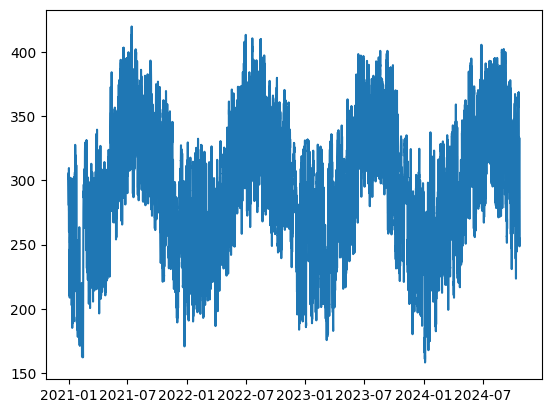

In [110]:
plt.plot(df_era5.index, df_era5["strd"])

In [111]:
df.columns

Index(['PT JKM325 nr 1 [°C]', 'PT JKM325 nr 2 [°C]', 'PT JKM325 nr 3 [°C]',
       'PT JKM335 nr 1 [°C]', 'PT JKM335 nr 2 [°C]', 'PT JKM335 nr 3 [°C]',
       'PT REC nr 1 [°C]', 'PT REC nr 2 [°C]', 'PT REC nr 3 [°C]',
       'PT SunP nr 1 [°C]', 'PT SunP nr 2 [°C]', 'PT SunP nr 3 [°C]',
       'PT Talesun 1 [°C]', 'PT Talesun 2 [°C]', 'PT Talesun 3 [°C]',
       'PT Talesun FrLess 1 [°C]', 'PT Talesun FrLess 2 [°C]',
       'PT Talesun FrLess 3 [°C]', 'Irradiance (IRR Hor - SunP) [W/m²]',
       'Irradiance (IRR Plan - SunP) [W/m²]',
       'Irradiance (IRR Plan - Talesun) [W/m²]',
       'Irradiance (IRR Plan - JKM325) [W/m²]',
       'Irradiance (IRR Plan - JKM335) [W/m²]',
       'Irradiance (SMP10 Sunpower plan) [W/m²]',
       'Irradiance (SMP10 Sunpower horisontal) [W/m²]',
       'Irradiance (SMP10 Talesun albedo) [W/m²]',
       'Irradiance (SMP10 Talesun plan) [W/m²]',
       'Irradiance (KippZonen SMP10 20201023) [W/m²]',
       'WS500_1_Air pressure abs [hPa]', 'WS500_1_Air

In [112]:
df["era5"] = df_era5["strd"]

### Plotting function for comparison

In [113]:
import matplotlib.dates as mdates

def plot_comparison(x, temp_model, temp_measured, module_name):
    if not isinstance(x, pd.DatetimeIndex):
        x = pd.to_datetime(x)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 5), gridspec_kw={'height_ratios': [1.9, 1]}, sharex=True)
    ax1.plot(x, temp_model, label="Estimated module temperature")
    ax1.plot(x, temp_measured, label="Measured module temperature")
    ax1.set_ylabel("Temperature [°C]", fontsize=12)
    ax1.tick_params(which="both", direction='in')
    
    ax2.plot(x, temp_model-temp_measured)
    ax2.set_ylabel("Residuals [°C]", fontsize=12)
    ax2.axhline(0, c="grey", linestyle=":")
    ax1.legend(fontsize=12)
    
    ax2.xaxis.set_major_locator(mdates.HourLocator(byhour=12))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax2.xaxis.set_minor_locator(mdates.HourLocator(byhour=[3, 9, 15, 21]))#interval=6))  # 0, 6, 12, 18 hours
    ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0, fontsize=12)
    plt.setp(ax2.xaxis.get_minorticklabels(), rotation=0, fontsize=10, color="gray")

    ax2.tick_params(axis='x', which='major', pad=20, direction="in")
    ax2.tick_params(axis='x', which='minor', pad=5, labelsize=10, labelcolor="gray", direction="in", labelrotation=0)

    plt.tight_layout()
    plt.show()

### Faiman rad

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28005 entries, 2021-03-03 14:00:00+00:00 to 2024-08-12 21:00:00+00:00
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   PT JKM325 nr 1 [°C]                            28005 non-null  float64
 1   PT JKM325 nr 2 [°C]                            28005 non-null  float64
 2   PT JKM325 nr 3 [°C]                            28005 non-null  float64
 3   PT JKM335 nr 1 [°C]                            28005 non-null  float64
 4   PT JKM335 nr 2 [°C]                            28005 non-null  float64
 5   PT JKM335 nr 3 [°C]                            28005 non-null  float64
 6   PT REC nr 1 [°C]                               28005 non-null  float64
 7   PT REC nr 2 [°C]                               28005 non-null  float64
 8   PT REC nr 3 [°C]                               28005 non-null  float64
 9   PT 

All arguments may be scalars or vectors. If multiple arguments are vectors they must be the same length.

When only irradiance, air temperature and wind speed inputs are provided (ir_down is None) this function calculates the same device temperature as the original faiman model. When down-welling long-wave radiation data are provided as well (ir_down is not None) the default u0 and u1 values from the original model should not be used because a portion of the radiative losses would be double-counted.

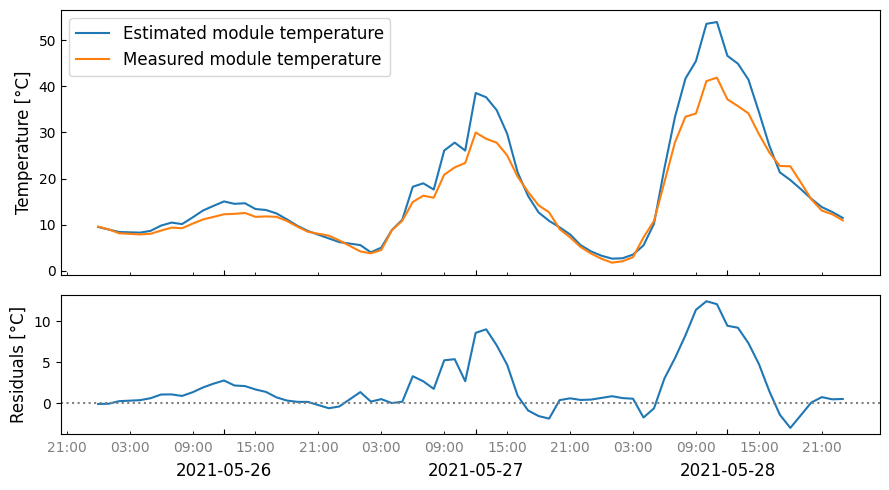

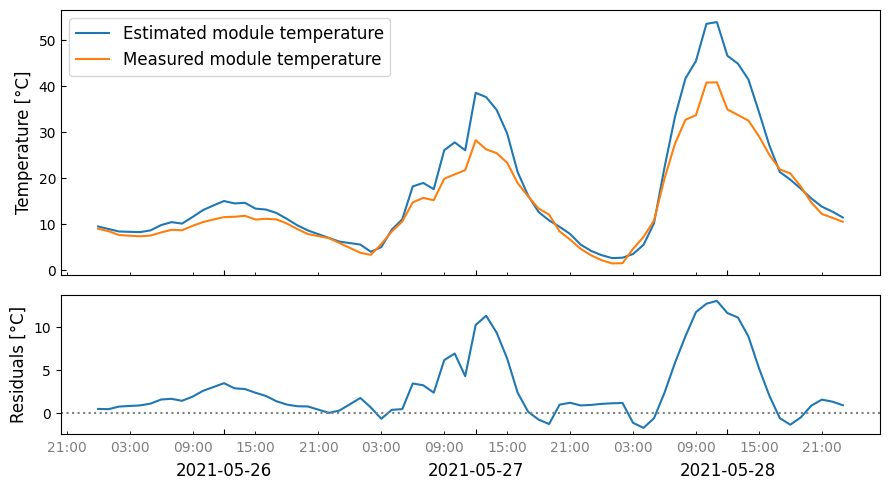

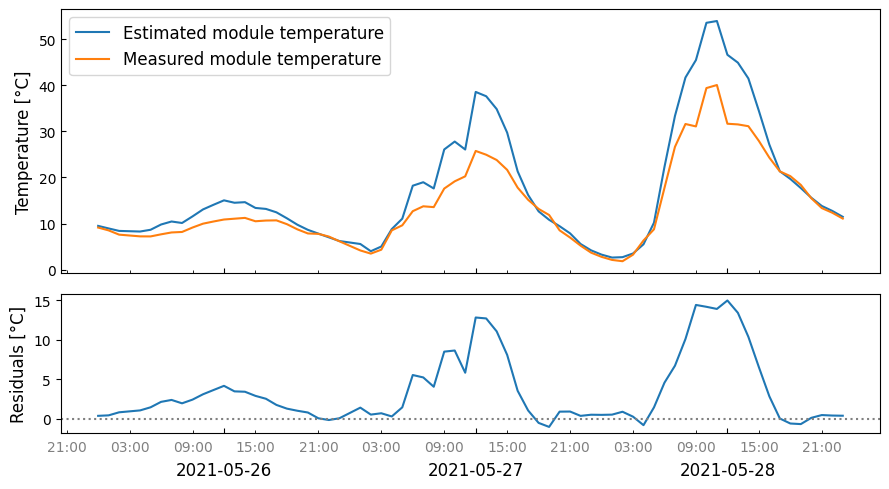

In [115]:
datea = '2021-05-26'
dateb = '2021-05-28'

#Bifacial panel
temp_faiman1 = temperature.faiman_rad(df["Irradiance (IRR Plan - Talesun) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
plot_comparison(df.loc[datea:dateb].index, temp_faiman1.loc[datea:dateb], df["PT Talesun FrLess 3 [°C]"].loc[datea:dateb], "PT Talesun FrLess 3")
temp_faiman2 = temperature.faiman_rad(df["Irradiance (IRR Plan - Talesun) [W/m²]"], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
plot_comparison(df.loc[datea:dateb].index, temp_faiman2.loc[datea:dateb], df["PT Talesun 2 [°C]"].loc[datea:dateb], "PT Talesun 2")
#Normal panel
temp_faiman3 = temperature.faiman_rad(df["Irradiance (IRR Plan - SunP) [W/m²]"], df['PT SunP nr 1 [°C]'], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
plot_comparison(df.loc[datea:dateb].index, temp_faiman2.loc[datea:dateb], df['PT SunP nr 1 [°C]'].loc[datea:dateb], "PT SunP nr 1")

### Mean Bias Error

In [116]:
def MBE(model_results, measured_temp, irradiance): 
    df_temp = pd.DataFrame({'model_results': model_results, 'measured_temp': measured_temp})#, 'irradiance': irradiance})
    df_temp = df_temp.dropna(how="any")
    #df_temp = df_temp[df_temp["irradiance"]>10]
    #Calculating MBE
    mbe = (1/len(df_temp["model_results"])) * np.sum(df_temp["model_results"] - df_temp["measured_temp"]) #np.sqrt(((df_temp["model_results"] - df_temp["measured_temp"])**2).mean())
    return mbe

### Root Mean Squared Error

In [117]:
#RMSE
def rmse(model_results, measured_temp, irradiance):
    df_temp = pd.DataFrame({'model_results': model_results, 'measured_temp': measured_temp})#, 'irradiance': irradiance})
    df_temp = df_temp.dropna(how="any")
    #df_temp = df_temp[df_temp["irradiance"]>10]

    #Calculating RMSE
    rmse = np.sqrt(((df_temp["model_results"] - df_temp["measured_temp"])**2).mean())
    return rmse

### Calculating and saving values for comparison

In [118]:
temp_faiman1 = temperature.faiman_rad(df['Irradiance (IRR Plan - JKM325) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
temp_faiman2 = temperature.faiman_rad(df['Irradiance (IRR Plan - JKM335) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
temp_faiman3 = temperature.faiman_rad(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
temp_faiman4 = temperature.faiman_rad(df['Irradiance (IRR Plan - SunP) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
temp_faiman5 = temperature.faiman_rad(df['Irradiance (IRR Plan - Talesun) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)
temp_faiman6 = temperature.faiman_rad(df['Irradiance (IRR Plan - Talesun) [W/m²]'], df["WS500_1_Temperature [°C]"], df["WS500_1_Wind speed [m/s]"], ir_down=df["era5"], u0=20.74, u1=2.91, sky_view=0.78)

In [119]:
module_names = ["PT JKM325 nr 3", "PT JKM335 nr 3", "PT SunP nr 2", "PT REC nr 3", "PT Talesun FrLess 1",  "PT Talesun 3"]

MBE1 = MBE(temp_faiman1, df["PT JKM325 nr 3 [°C]"], df['Irradiance (IRR Plan - JKM325) [W/m²]'])
MBE2 = MBE(temp_faiman2, df["PT JKM335 nr 3 [°C]"], df['Irradiance (IRR Plan - JKM335) [W/m²]'])
MBE3 = MBE(temp_faiman3, df['PT SunP nr 2 [°C]'], df['Irradiance (IRR Plan - SunP) [W/m²]'])
MBE4 = MBE(temp_faiman4, df['PT REC nr 3 [°C]'], df['Irradiance (IRR Plan - SunP) [W/m²]'])
MBE5 = MBE(temp_faiman5, df["PT Talesun FrLess 1 [°C]"], df['Irradiance (IRR Plan - Talesun) [W/m²]'])
MBE6 = MBE(temp_faiman6, df["PT Talesun 3 [°C]"], df['Irradiance (IRR Plan - Talesun) [W/m²]'])

In [120]:
RMSE1 = rmse(temp_faiman1, df["PT JKM325 nr 3 [°C]"], df['Irradiance (IRR Plan - JKM325) [W/m²]'])
RMSE2 = rmse(temp_faiman2, df["PT JKM335 nr 3 [°C]"], df['Irradiance (IRR Plan - JKM335) [W/m²]'])
RMSE3 = rmse(temp_faiman3, df['PT SunP nr 2 [°C]'], df['Irradiance (IRR Plan - SunP) [W/m²]'])
RMSE4 = rmse(temp_faiman4, df['PT REC nr 3 [°C]'], df['Irradiance (IRR Plan - SunP) [W/m²]'])
RMSE5 = rmse(temp_faiman5, df["PT Talesun FrLess 1 [°C]"], df['Irradiance (IRR Plan - Talesun) [W/m²]'])
RMSE6 = rmse(temp_faiman6, df["PT Talesun 3 [°C]"], df['Irradiance (IRR Plan - Talesun) [W/m²]'])

In [121]:
results = pd.DataFrame({
    "Module": module_names,
    "RMSE": [RMSE1, RMSE2, RMSE3, RMSE4, RMSE5, RMSE6],
    "MBE": [MBE1, MBE2, MBE3, MBE4, RMSE5, RMSE6]
})

In [122]:
results.to_csv('Faiman_rad_results.csv', index=False)

In [123]:
results

,Module,RMSE,MBE
0,PT JKM325 nr 3,5.068105,4.422716
1,PT JKM335 nr 3,5.568337,4.825923
2,PT SunP nr 2,4.320777,2.619559
3,PT REC nr 3,4.561825,3.322797
4,PT Talesun FrLess 1,3.298237,3.298237
5,PT Talesun 3,4.116889,4.116889


In [124]:
import matplotlib.dates as mdates

def plot_comparison(x, temp_model, temp_measured, save_as):
    if not isinstance(x, pd.DatetimeIndex):
        x = pd.to_datetime(x)
   
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 5), gridspec_kw={'height_ratios': [1.9, 1]}, sharex=True)
    ax1.plot(x, temp_model, label="Estimated module temperature")
    ax1.plot(x, temp_measured, label="Measured module temperature")
    ax1.set_ylabel("Temperature [°C]", fontsize=12)
    ax1.tick_params(which="both", direction='in')
    
    ax2.plot(x, temp_model-temp_measured)
    ax2.set_ylabel("Residuals [°C]", fontsize=12)
    ax2.axhline(0, c="grey", linestyle=":")
    ax1.legend(fontsize=12)
    
    ax2.xaxis.set_major_locator(mdates.HourLocator(byhour=12))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    ax2.xaxis.set_minor_locator(mdates.HourLocator(byhour=[3, 9, 15, 21]))#interval=6))  # 0, 6, 12, 18 hours
    ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))

    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0, fontsize=12)
    plt.setp(ax2.xaxis.get_minorticklabels(), rotation=0, fontsize=10, color="gray")

    ax2.tick_params(axis='x', which='major', pad=20, direction="in")
    ax2.tick_params(axis='x', which='minor', pad=5, labelsize=10, labelcolor="gray", direction="in", labelrotation=0)

    plt.tight_layout()
    plt.savefig("img/faiman_rad/"+save_as, bbox_inches='tight')
    plt.show()

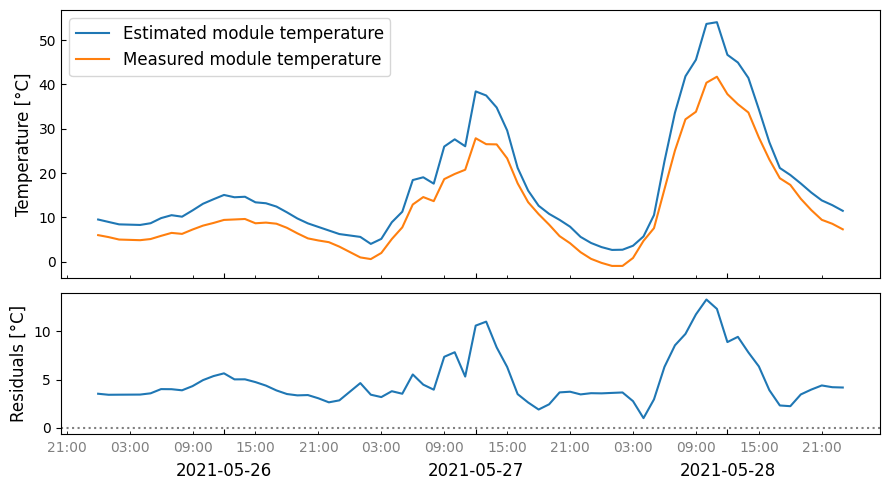

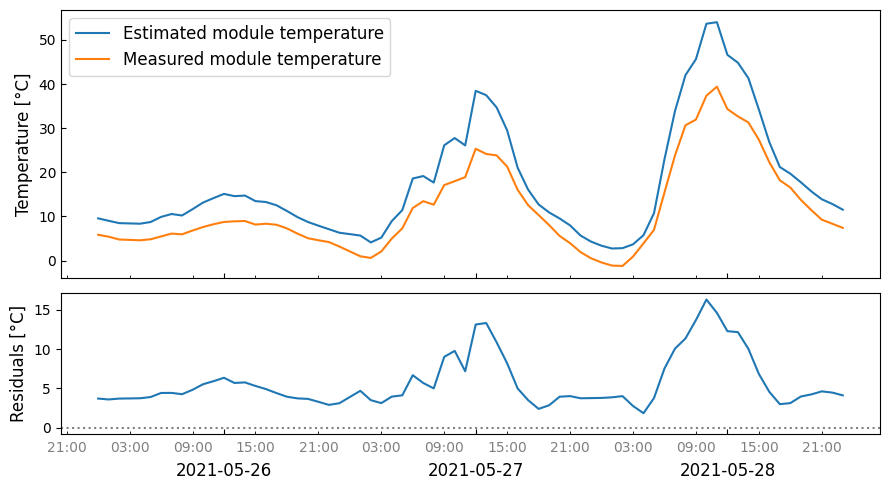

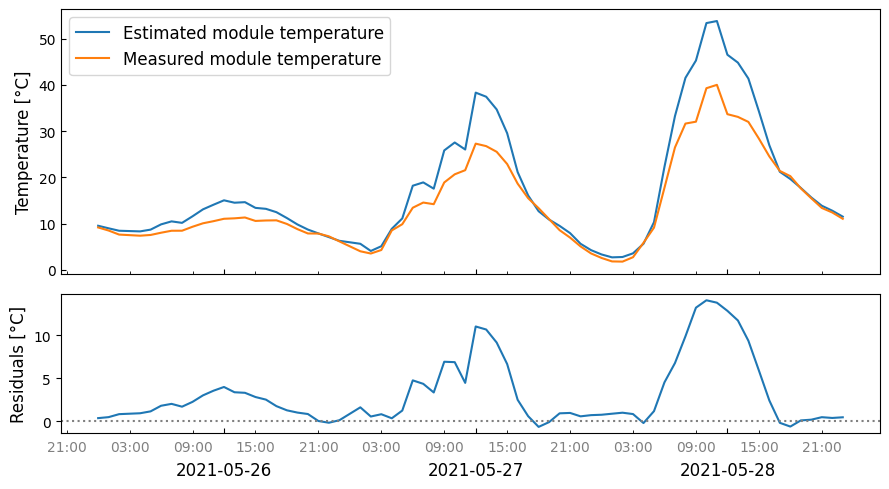

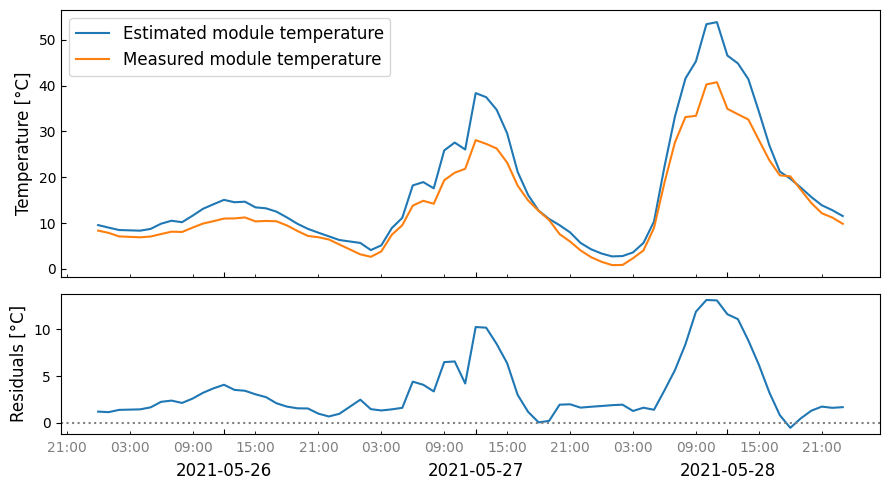

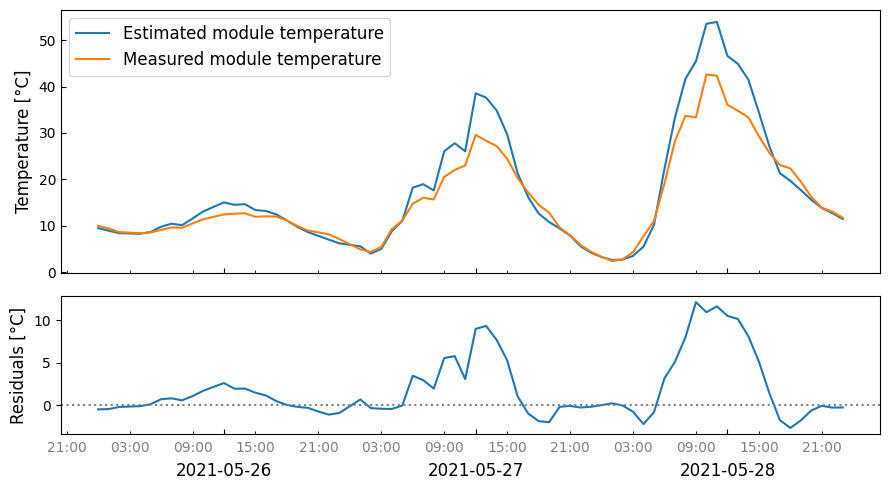

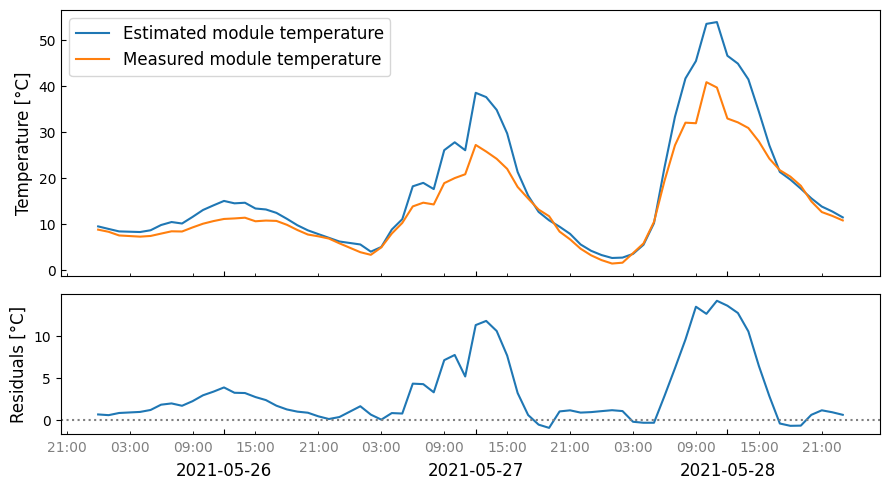

In [125]:
datea = '2021-05-26'
dateb = '2021-05-28'

plot_comparison(df.loc[datea:dateb].index, temp_faiman1.loc[datea:dateb], df["PT JKM325 nr 3 [°C]"].loc[datea:dateb], "PT JKM325 nr 3")
plot_comparison(df.loc[datea:dateb].index, temp_faiman2.loc[datea:dateb], df["PT JKM335 nr 3 [°C]"].loc[datea:dateb], "PT JKM335 nr 3")
plot_comparison(df.loc[datea:dateb].index, temp_faiman3.loc[datea:dateb], df['PT SunP nr 2 [°C]'].loc[datea:dateb], "PT SunP nr 2")
plot_comparison(df.loc[datea:dateb].index, temp_faiman4.loc[datea:dateb], df['PT REC nr 3 [°C]'].loc[datea:dateb], "PT REC nr 3")
plot_comparison(df.loc[datea:dateb].index, temp_faiman5.loc[datea:dateb], df["PT Talesun FrLess 1 [°C]"].loc[datea:dateb], "PT Talesun FrLess 1")
plot_comparison(df.loc[datea:dateb].index, temp_faiman6.loc[datea:dateb], df["PT Talesun 3 [°C]"].loc[datea:dateb], "PT Talesun 3")